In [ ]:
import tensorflow as tf

## Load MNIST Data set

In [ ]:
mnist = tf.keras.datasets.mnist # handwritten characters from 0-9, 28x28 size

In [ ]:
# Divide MNIST dataset into training and testing datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"Training shape: {x_train.shape}") # 60,000 test samples
print(f"Testing shape: {x_test.shape}") # 10,100 train samples

Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


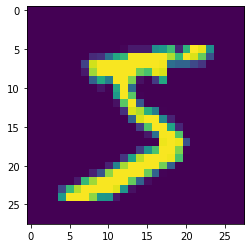

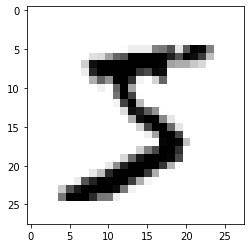

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap=plt.cm.binary)

# Data Preprocessing

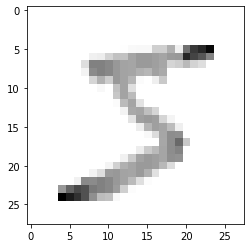

In [ ]:
# normalize data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [ ]:
print(y_train[0]) # check the label for x_train[0]

5


In [ ]:
# Resize image inorder to apply Convolution operation
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Increasing by 1 dim
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Increasing by 1 dim
print(f"Training Sample Dimention {x_trainr.shape}")
print(f"Testing Sample Dimention {x_testr.shape}")

Training Sample Dimention (60000, 28, 28, 1)
Testing Sample Dimention (10000, 28, 28, 1)


# Create Neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
# Create Neural Network and train on 60,000 samples of MNIST dataset
model = Sequential()

# 1st Convolution layer
model.add(Conv2D(64, (3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layer 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

# Last fully connected layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
print(f"Total Training Samples = {len(x_trainr)}")

Total Training Samples = 60000


#Train/Test Model

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 16s 5ms/step - loss: 0.3272 - accuracy: 0.8961 - val_loss: 0.1567 - val_accuracy: 0.9513
Epoch 2/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1067 - accuracy: 0.9680 - val_loss: 0.0924 - val_accuracy: 0.9704
Epoch 3/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0747 - accuracy: 0.9765 - val_loss: 0.0781 - val_accuracy: 0.9743
Epoch 4/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0571 - accuracy: 0.9820 - val_loss: 0.0744 - val_accuracy: 0.9774
Epoch 5/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0619 - val_accuracy: 0.9805


In [ ]:
# Evalutate on testing data
test_loss, test_acc = model.evaluate(x_testr, y_test)
print(f"Test Loss on 10,00 samples {test_loss}")
print(f"Validation Accuracy on 10,00 samples {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0556 - accuracy: 0.9832
Test Loss on 10,00 samples 0.05562456697225571
Validation Accuracy on 10,00 samples 0.9832000136375427


In [ ]:
predictions = model.predict([x_testr])

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(predictions)

[[1.0575644e-07 1.7772394e-05 1.0508075e-05 ... 9.9973589e-01
  7.1912802e-07 2.2518137e-04]
 [7.6748729e-05 7.9489226e-05 9.9962044e-01 ... 1.6157451e-04
  4.9749942e-06 4.8045672e-07]
 [7.1909135e-06 9.9900585e-01 1.8936067e-05 ... 1.2867650e-04
  8.2811719e-05 2.5287946e-04]
 ...
 [1.2136918e-07 6.0808458e-07 7.0150044e-08 ... 2.0068026e-06
  3.4039185e-05 1.2658435e-04]
 [4.0229265e-06 5.2427286e-08 5.6300149e-08 ... 1.4477958e-07
  2.9742179e-04 1.0173894e-05]
 [5.4520104e-05 1.4344831e-06 1.1223521e-05 ... 1.0504405e-06
  2.0066307e-04 2.2400243e-05]]


In [ ]:
print(np.argmax(predictions[0]))

7


# Visualize Predictions With Test Data

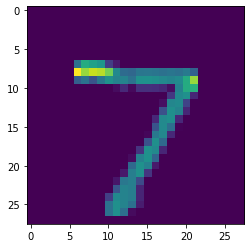

In [ ]:
plt.imshow(x_test[0])

In [ ]:
print(np.argmax(predictions[128]))

8


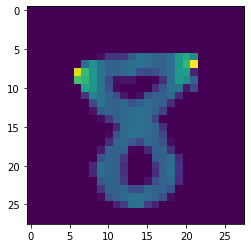

In [ ]:
plt.imshow(x_test[128])

# Demo on new uploaded image

In [ ]:
import cv2

In [ ]:
img = cv2.imread("5.png") # Read image from directory

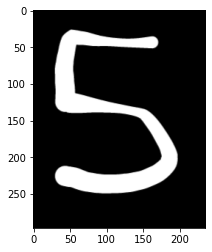

In [ ]:
plt.imshow(img) 

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 

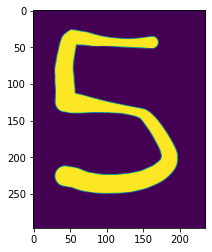

In [ ]:
plt.imshow(gray)

In [ ]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

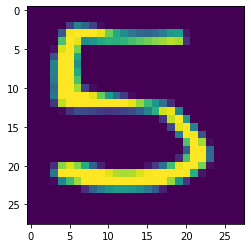

In [ ]:
plt.imshow(resized)

In [ ]:
print(f"Original Shape {img.shape}")
print(f"Resized Shape {resized.shape}")

Original Shape (297, 235, 3)
Resized Shape (28, 28)


In [ ]:
newimg = tf.keras.utils.normalize (resized, axis=1)

In [ ]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [ ]:
newimg.shape

(1, 28, 28, 1)

In [ ]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 147ms/step


In [ ]:
print(np.argmax(predictions)) # Model gives correct prediction of 5

5


In [ ]:
!mkdir -p saved_model #Save Model
model.save('my_model')